# Chicago Crime Analysis (2018–2022)
*A minimal, reproducible EDA demonstrating categorical, time-series, and spatial visualization.*

**Author:** Khushboo Shafi ; **Date:** 2025-09-11

## Overview
This notebook analyzes Chicago crime incidents from **2018–2022** to illustrate three core data types:
- **Time-series** – trends across years (and optional seasonality).
- **Categorical** – distribution of crime types.
- **Spatial** – point-density overlay on a Chicago base map.


## Dataset
- **Source (mirror used):** Kaggle – *Chicago Crime Dataset (2018–2022)* (republished from the City of Chicago Data Portal).
- **Original provider:** City of Chicago Data Portal — *Crimes (2001–present)*.
- **Files:** One CSV per year named `2018.csv`, ..., `2022.csv` located alongside this notebook.
- **Columns (subset):** `Date`, `Primary Type`, `Latitude`, `Longitude`, `District`, `Community Area`, `Arrest`, `Domestic`, etc.

> If running online, ensure the CSVs are available (upload to the environment or adjust paths).

## Quick Start
```bash
# 1) Install deps (if needed)
pip install pandas matplotlib seaborn

# 2) Place CSVs (2018–2022) + chicago_map.jpg in same folder as the notebook
# 3) Run all cells
```

---
## Sections
1. **Imports & Setup**
2. **Load & Prepare Data**
3. **Time-Series Visualization**
4. **Categorical Visualization**
5. **Spatial Visualization**
6. **(Optional) Temporal Patterns (Month/Day/Hour)**

In [1]:
import pandas as pd
import glob

# Path to all CSVs 
files = glob.glob("*.csv")  
# Read and combine
df_list = [pd.read_csv(f, parse_dates=["Date"], low_memory=False) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Quick checks
print(df.shape)      # rows, columns
print(df['Year'].value_counts().sort_index())  # check year coverage
print(df.head())

/var/folders/n4/8n2hpd_912g5cknmv3k37fjm0000gn/T/ipykernel_52105/2687240345.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_list = [pd.read_csv(f, parse_dates=["Date"], low_memory=False) for f in files]
/var/folders/n4/8n2hpd_912g5cknmv3k37fjm0000gn/T/ipykernel_52105/2687240345.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_list = [pd.read_csv(f, parse_dates=["Date"], low_memory=False) for f in files]
/var/folders/n4/8n2hpd_912g5cknmv3k37fjm0000gn/T/ipykernel_52105/2687240345.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_list = [pd.read_csv(f, parse_

(1168094, 22)
Year
2018    268061
2019    260627
2020    211426
2021    207430
2022    220550
Name: count, dtype: int64
         ID Case Number       Date                  Block  IUCR  \
0  12016034    JD193556 2020-01-01  018XX N WINNEBAGO AVE  1153   
1  12220321    JD430436 2020-01-01     091XX S DREXEL AVE  1752   
2  12013828    JD191019 2020-01-01   044XX S LAVERGNE AVE  0281   
3  12019692    JD197444 2020-01-01    032XX N LINCOLN AVE  1153   
4  12843813    JF415893 2020-01-01        022XX E 70TH ST  1153   

                 Primary Type  \
0          DECEPTIVE PRACTICE   
1  OFFENSE INVOLVING CHILDREN   
2     CRIMINAL SEXUAL ASSAULT   
3          DECEPTIVE PRACTICE   
4          DECEPTIVE PRACTICE   

                                         Description Location Description  \
0                FINANCIAL IDENTITY THEFT OVER $ 300            APARTMENT   
1  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER            RESIDENCE   
2                                     NON-AGGRA

# Chicago Crime Data (2018–2022) – EDA Framework

## Data Overview

Shape of dataset (rows, columns).

Column names, dtypes.

Missing values per column.

First/last rows (time coverage check).

In [2]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())
print("\nYears covered:", df['Year'].unique())

Shape: (1168094, 22)

Columns: ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

Missing values:
 ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     5059
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       49
Community Area              1
FBI Code                    0
X Coordinate            17232
Y Coordinate            17232
Year                        0
Updated On                  0
Latitude                17232
Longitude               17232
Location                17232
dtype: int64

Year

## Data Quality & Cleaning

Handle missing Lat/Lon for spatial analysis.

Convert Date to datetime.

Extract Year, Month, DayOfWeek.

Ensure Arrest and Domestic are boolean.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

## Time-Series (trend across years)

Plot total crimes per year (2018–2022).

Shows the effect of pandemic years (2020–2021 dip).

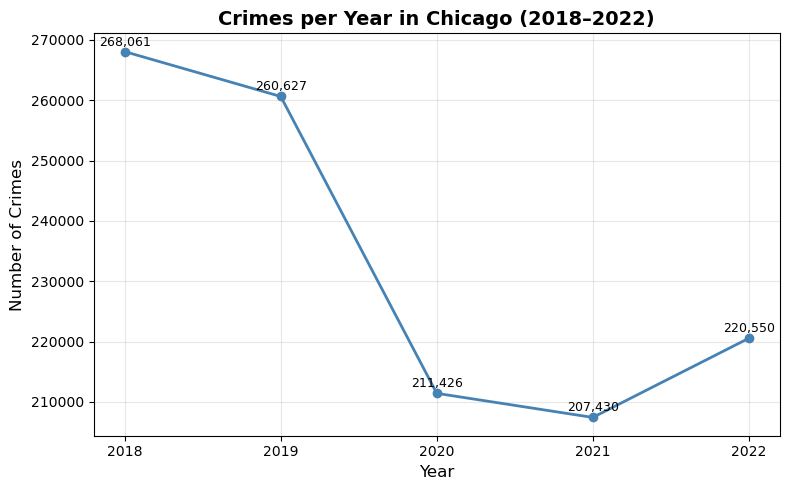

In [8]:
import matplotlib.pyplot as plt

# Crimes per year
yearly = df.groupby('Year').size()

plt.figure(figsize=(8,5))
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, color='steelblue')

# Beautify
plt.title("Crimes per Year in Chicago (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(yearly.index)  # whole years
plt.grid(alpha=0.3)
plt.tight_layout()

# Add data labels
for x, y in zip(yearly.index, yearly.values):
    plt.text(x, y+1000, f"{y:,}", ha='center', fontsize=9)

# Save figure (choose format)
plt.savefig("crimes_per_year.png", dpi=300)   # PNG

plt.show()


## Categorical Analysis – Top 5 Crime Types (2018–2022)

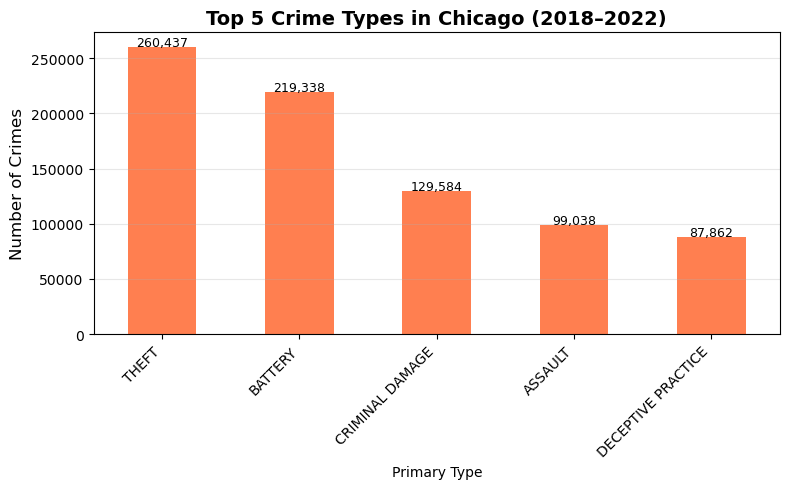

In [9]:
import matplotlib.pyplot as plt

# Top 5 crime categories
top5 = df['Primary Type'].value_counts().head(5)

plt.figure(figsize=(8,5))
top5.plot(kind='bar', color='coral')

# Beautify
plt.title("Top 5 Crime Types in Chicago (2018–2022)", fontsize=14, weight='bold')
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add data labels
for i, v in enumerate(top5.values):
    plt.text(i, v+1000, f"{v:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("top5_crime_types.png", dpi=300)  # Save figure
plt.show()


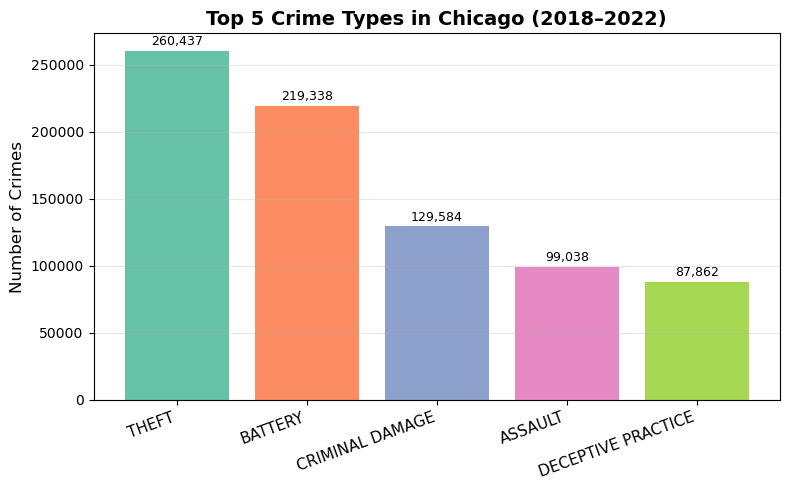

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 crime categories
top5 = df['Primary Type'].value_counts().head(5)

plt.figure(figsize=(8,5))
colors = sns.color_palette("Set2", n_colors=5)  # nice multi-color palette
bars = plt.bar(top5.index, top5.values, color=colors)

# Beautify
plt.title("Top 5 Crime Types in Chicago (2018–2022)", fontsize=14, weight='bold')
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f"{yval:,}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("top5_crime_types_colored.png", dpi=300)
plt.show()


## 📍 Spatial Analysis – Crime Hotspots in Chicago (2018–2022)

Since we don’t want the scatterplot to be too heavy (over 1M points), we’ll sample the dataset (e.g., 30k–50k rows) and make a density-style scatterplot.

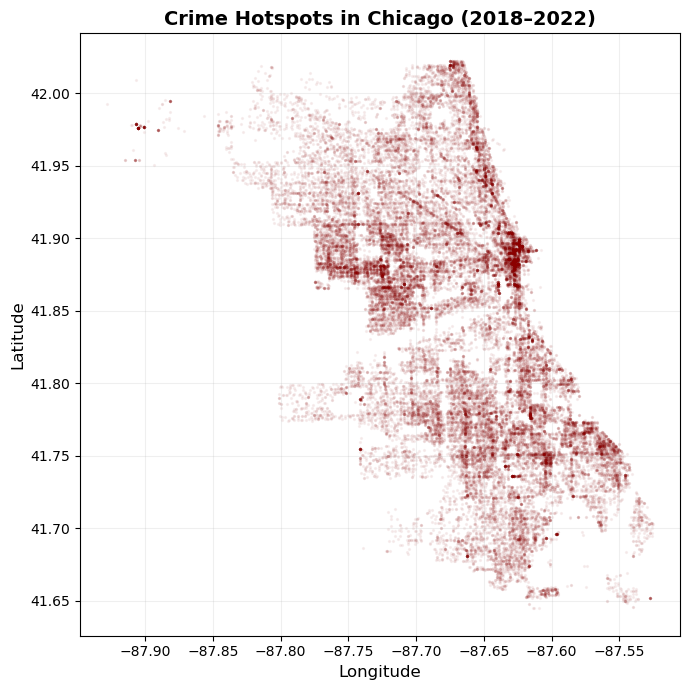

In [11]:
import matplotlib.pyplot as plt

# Drop rows without coordinates
df_geo = df.dropna(subset=['Latitude','Longitude'])

# Take a sample for visualization
sample = df_geo.sample(40000, random_state=42)

plt.figure(figsize=(7,7))
plt.scatter(sample['Longitude'], sample['Latitude'], 
            alpha=0.05, s=2, color="darkred")

# Beautify
plt.title("Crime Hotspots in Chicago (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()

# Save high-resolution figure
plt.savefig("crime_hotspots_chicago.png", dpi=300)
plt.show()

### Scatter Hotspot Map

Shows exact crime locations (sampled).

Darker clusters (downtown Chicago, near the Loop and West Side) = crime hotspots.

Spread is visible across the whole city but concentrated in the central and south regions.

Advantage → precise points.

Limitation → looks noisy because every point is plotted.

/var/folders/n4/8n2hpd_912g5cknmv3k37fjm0000gn/T/ipykernel_52105/951051550.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


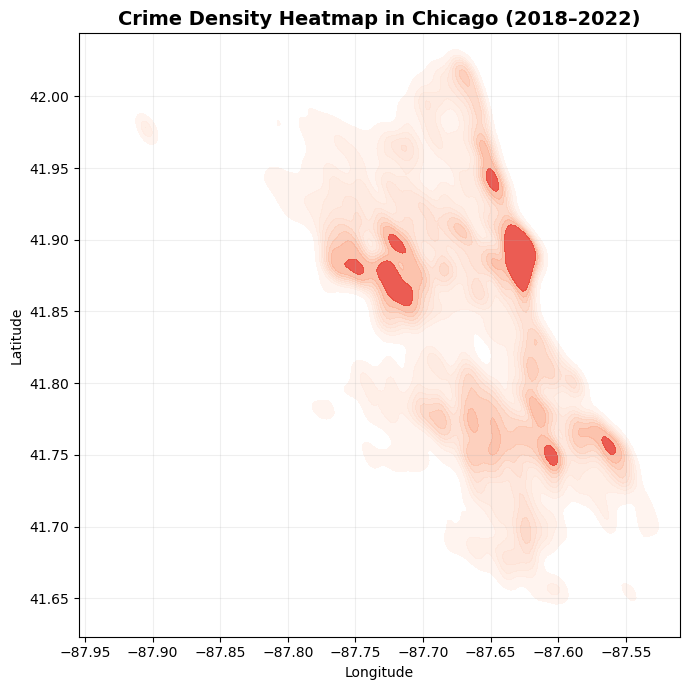

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the same geo-cleaned dataset
df_geo = df.dropna(subset=['Latitude','Longitude'])
sample = df_geo.sample(50000, random_state=42)  # sample for speed

plt.figure(figsize=(7,7))
sns.kdeplot(
    x=sample['Longitude'], y=sample['Latitude'],
    cmap="Reds", shade=True, bw_adjust=0.5, alpha=0.8, fill=True, thresh=0.05
)

plt.title("Crime Density Heatmap in Chicago (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("crime_density_heatmap.png", dpi=300)
plt.show()

## Density Heatmap

Smooths the scatter data into intensity regions.

Highlights the same hotspots, but easier to interpret (red = high crime density).

Downtown & surrounding neighborhoods emerge clearly as crime-heavy.

Advantage → visually clear for reports.

Limitation → loses fine-grain location details.

#### Both plots confirm crime is highly clustered in downtown and west Chicago, tapering off toward suburbs. The scatter map is good for detail, while the heatmap is good for communicating overall density.

## Seasonality – Crimes by Month

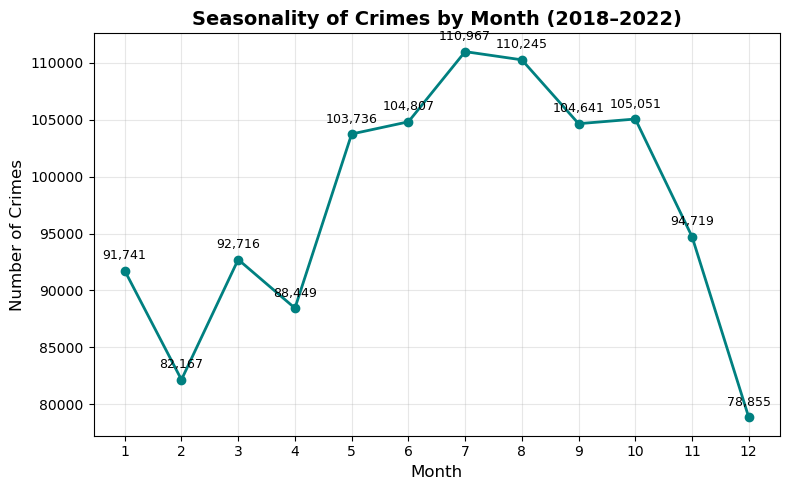

In [14]:
import matplotlib.pyplot as plt

# Crimes aggregated by month across all years
monthly = df.groupby('Month').size()

plt.figure(figsize=(8,5))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=2, color='teal')

# Beautify
plt.title("Seasonality of Crimes by Month (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(range(1,13))
plt.grid(alpha=0.3)

# Add labels
for x, y in zip(monthly.index, monthly.values):
    plt.text(x, y+1000, f"{y:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("crimes_by_month.png", dpi=300)
plt.show()

### Seasonality (Crimes by Month)

Crimes show clear seasonal variation.

Levels are lowest in winter (December–February), especially in February (~82k crimes).

Crimes rise steadily through spring and peak in July (111k) and August (110k), indicating summer is the riskiest period.

After summer, crime numbers decline gradually towards winter.

##### Interpretation: Warmer months may lead to more outdoor activity and thus more opportunities for crime.

## Weekly Trend – Crimes by Day of Week

/var/folders/n4/8n2hpd_912g5cknmv3k37fjm0000gn/T/ipykernel_52105/487569823.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly.index, y=weekly.values, palette="muted")


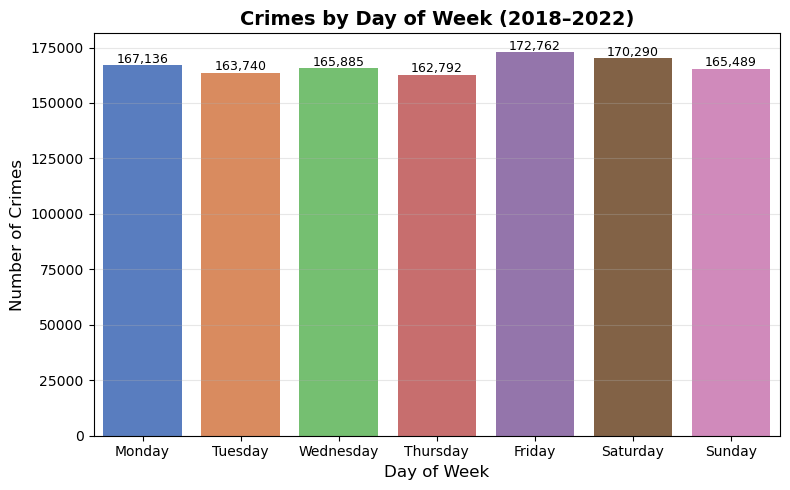

In [15]:
import seaborn as sns

# Crimes aggregated by day of week
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekly = df['DayOfWeek'].value_counts().reindex(dow_order)

plt.figure(figsize=(8,5))
sns.barplot(x=weekly.index, y=weekly.values, palette="muted")

# Beautify
plt.title("Crimes by Day of Week (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add labels
for i, v in enumerate(weekly.values):
    plt.text(i, v+1000, f"{v:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("crimes_by_dayofweek.png", dpi=300)
plt.show()

### Weekly Trend (Crimes by Day of Week)

Crimes are relatively stable throughout the week, but:

Friday (172k) and Saturday (170k) have slightly higher numbers than weekdays.

Thursday (162k) shows the lowest count.

The variation isn’t huge, but weekends do see a small increase in crime rates.

### Interpretation: Social activities and gatherings during weekends may explain this slight rise.

## Daily Cycle – Crimes by Hour

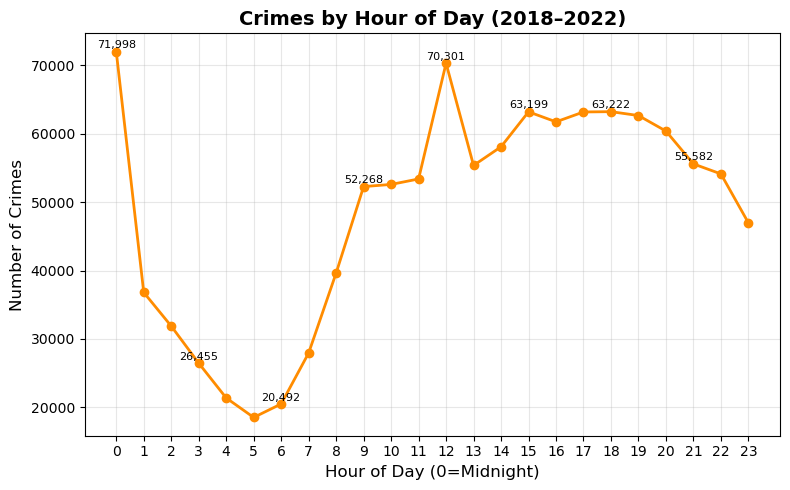

In [16]:
# Extract hour from Date column
df['Hour'] = df['Date'].dt.hour

hourly = df.groupby('Hour').size()

plt.figure(figsize=(8,5))
plt.plot(hourly.index, hourly.values, marker='o', linewidth=2, color='darkorange')

# Beautify
plt.title("Crimes by Hour of Day (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("Hour of Day (0=Midnight)", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(range(0,24))
plt.grid(alpha=0.3)

# Add labels for peaks
for x, y in zip(hourly.index, hourly.values):
    if x % 3 == 0:  # show every 3rd label
        plt.text(x, y+500, f"{y:,}", ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("crimes_by_hour.png", dpi=300)
plt.show()


### Daily Cycle (Crimes by Hour)

Crimes have a strong daily pattern:

Highest around midnight (72k) and again at noon (70k).

Steep decline during the early morning (lowest at 5 AM: ~18k crimes).

From morning to evening, crime steadily rises, peaking around lunch and staying relatively high until late evening.

Suggests two peaks per day: midnight (nighttime activity) and midday (daytime activity).

#### Interpretation: Nighttime crimes may be linked to nightlife/violence, while midday crimes could be thefts and property crimes when people are active outside.

### District-Level Aggregation (Bar Plot)

This uses your District column and gives a straightforward ranking of where crimes occur the most.

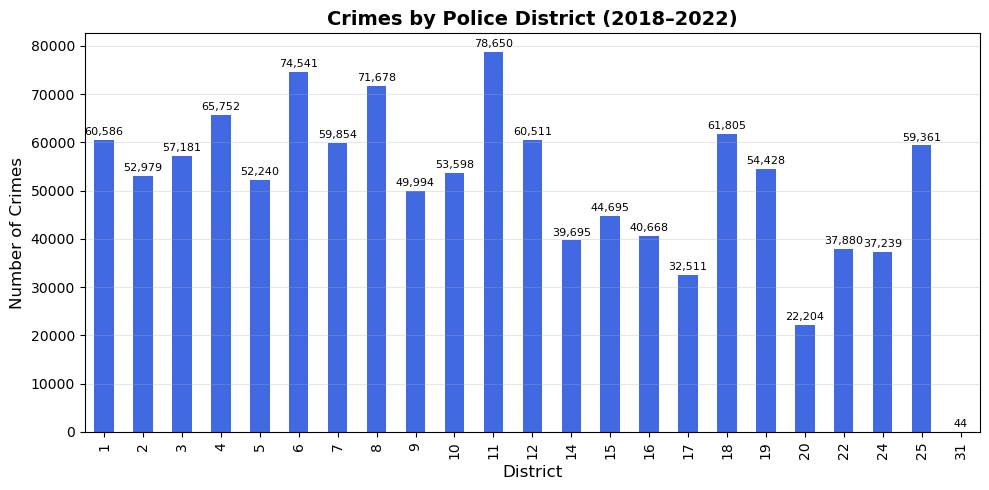

In [17]:
import matplotlib.pyplot as plt

# Group by District
district_counts = df['District'].value_counts().sort_index()

plt.figure(figsize=(10,5))
district_counts.plot(kind='bar', color="royalblue")

# Beautify
plt.title("Crimes by Police District (2018–2022)", fontsize=14, weight='bold')
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add labels
for i, v in enumerate(district_counts.values):
    plt.text(i, v+1000, f"{v:,}", ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("crimes_by_district.png", dpi=300)
plt.show()


## Overlaying Maps

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

# Clean subset with coordinates
df_geo = df.dropna(subset=['Latitude','Longitude']).copy()

# (Adjust if your screenshot is tighter/wider.)
BBOX = dict(lon_min=-87.95, lon_max=-87.55,  # Chicago approx
            lat_min=41.65,  lat_max=42.05)

img = mpimg.imread("chicago_map.jpg")


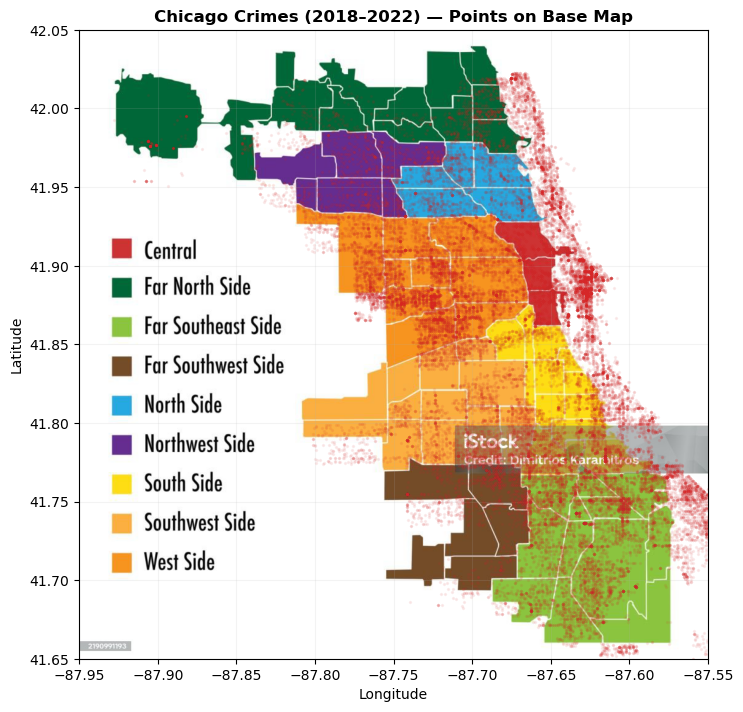

In [19]:
# sample to avoid overplot
sample = df_geo.sample(40000, random_state=42)

plt.figure(figsize=(7.5,7.5))
plt.imshow(img, extent=[BBOX['lon_min'], BBOX['lon_max'], BBOX['lat_min'], BBOX['lat_max']])
plt.scatter(sample['Longitude'], sample['Latitude'], s=2, alpha=0.07, color="#d62728", zorder=2)

plt.title("Chicago Crimes (2018–2022) — Points on Base Map", fontweight="bold")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.xlim(BBOX['lon_min'], BBOX['lon_max']); plt.ylim(BBOX['lat_min'], BBOX['lat_max'])
plt.grid(alpha=0.15)
plt.tight_layout()
plt.savefig("chicago_points_overlay.png", dpi=300)
plt.show()


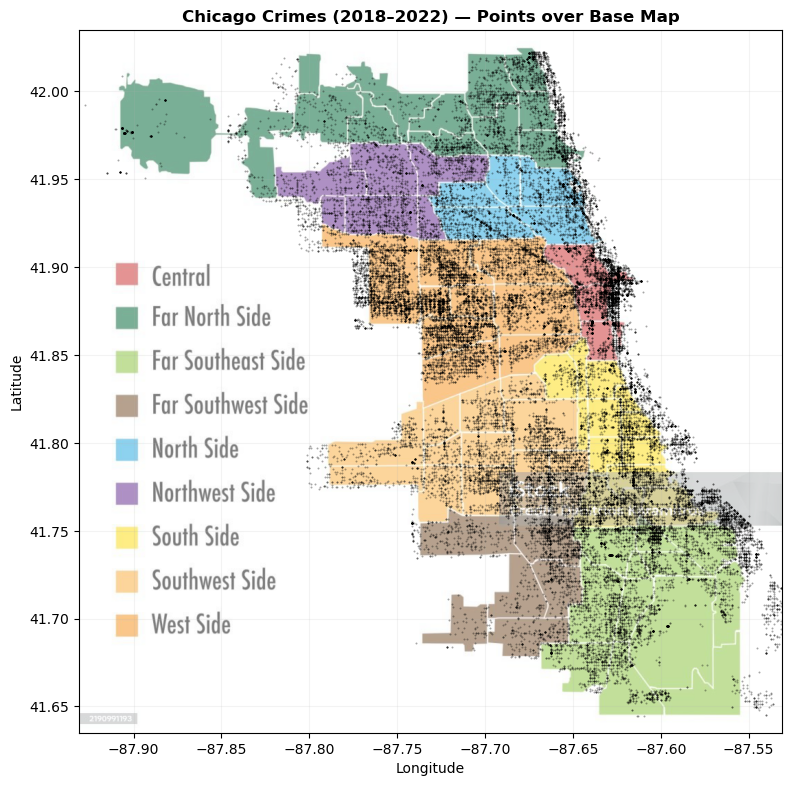

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# === 1) Load / prepare data ===
df_geo = df.dropna(subset=['Latitude','Longitude']).copy()
pts = df_geo.sample(40000, random_state=42)   # downsample for speed

# === 2) Map image + bounding box (tune these if needed) ===
img = mpimg.imread("chicago_map.jpg")

# Base bbox for Chicago (approx)
LON_MIN, LON_MAX = -87.95, -87.55
LAT_MIN, LAT_MAX =  41.65,  42.05

# Small alignment nudges (try a few values until edges line up)
SHIFT_LON = 0.019  # negative = shift map west (left); positive = east (right)
SHIFT_LAT =  -0.015   # negative = shift map south (down); positive = north (up)

ext = [LON_MIN + SHIFT_LON, LON_MAX + SHIFT_LON,
       LAT_MIN + SHIFT_LAT, LAT_MAX + SHIFT_LAT]

# === 3) Plot ===
plt.figure(figsize=(8,8))

# (a) draw the base map slightly faded
plt.imshow(img, extent=ext, zorder=0, alpha=0.70)

# (b) add a semi-transparent white veil so points stand out
plt.fill_between([ext[0], ext[1]], ext[2], ext[3], color="white", alpha=0.25, zorder=1)

# (c) plot crime points in black
plt.scatter(pts['Longitude'], pts['Latitude'],
            s=2, alpha=0.35, color="black", linewidths=0, zorder=2)

# Cosmetics
plt.title("Chicago Crimes (2018–2022) — Points over Base Map", fontweight="bold")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.xlim(ext[0], ext[1]); plt.ylim(ext[2], ext[3])
plt.grid(alpha=0.15)
plt.tight_layout()

# Save for your report
plt.savefig("chicago_points_overlay_black.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib.image as mpimg

# Load & prep
df = pd.concat([pd.read_csv(f"{y}.csv", parse_dates=["Date"]) for y in range(2018, 2023)], ignore_index=True)
d  = df.dropna(subset=["Date"]).assign(   #cleaned dataframe with derived time fields
    Year=lambda x: x["Date"].dt.year,
    Month=lambda x: x["Date"].dt.month,
    DayOfWeek=lambda x: x["Date"].dt.day_name(),
    Hour=lambda x: x["Date"].dt.hour
)

# 1) Time-series (yearly)
y = d.groupby("Year").size() #yearly counts (time-series)
plt.plot(y.index, y.values, marker="o"); plt.title("Crimes per Year (2018–2022)")
plt.tight_layout(); plt.savefig("fig_yearly.png", dpi=300); plt.clf()

# 2) Categorical (top 5 types)
t5 = d["Primary Type"].value_counts().head(5). #top 5 crime categories (categorical)
t5.plot(kind="bar"); plt.title("Top 5 Crime Types (2018–2022)")
plt.tight_layout(); plt.savefig("fig_top5_types.png", dpi=300); plt.clf()

# 3) Spatial (points over base map)
g   = d.dropna(subset=["Latitude","Longitude"]).sample(40000, random_state=42)
#40k sampled geo-points for plotting
img = mpimg.imread("chicago_map.jpg")
ext = [-87.96, -87.56, 41.64, 42.06]   # map bounding box; 
#nudge values slightly if the overlay is off
plt.imshow(img, extent=ext, alpha=0.7)
plt.fill_between([ext[0], ext[1]], ext[2], ext[3], color="white", alpha=0.25)
plt.scatter(g["Longitude"], g["Latitude"], s=2, alpha=0.35, color="black")
plt.title("Crime Locations on Chicago Map (2018–2022)")
plt.tight_layout(); plt.savefig("fig_spatial_map.png", dpi=300); plt.clf()